In [329]:
# Dependiences

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [330]:
# Dataset import
df=pd.read_csv('housing.csv')

In [331]:
# Data analyzes
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [333]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [334]:
# row count, column count
df.shape

(20640, 10)

In [335]:
# verifying which features have missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [336]:
# removin missing values
df.dropna(inplace=True)

In [337]:
#checking once again missing values
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Text(0.5, 0, 'House Values')

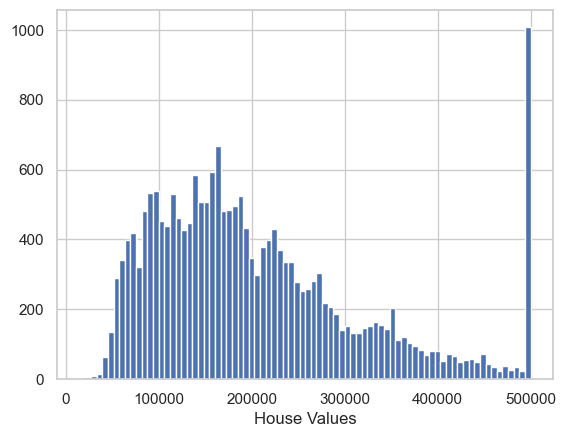

In [338]:
# Plot the distribution of the target variable (median_house_value) using a histogram

# bins = amount of columns
plt.hist(df['median_house_value'], bins=80)
plt.xlabel("House Values")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

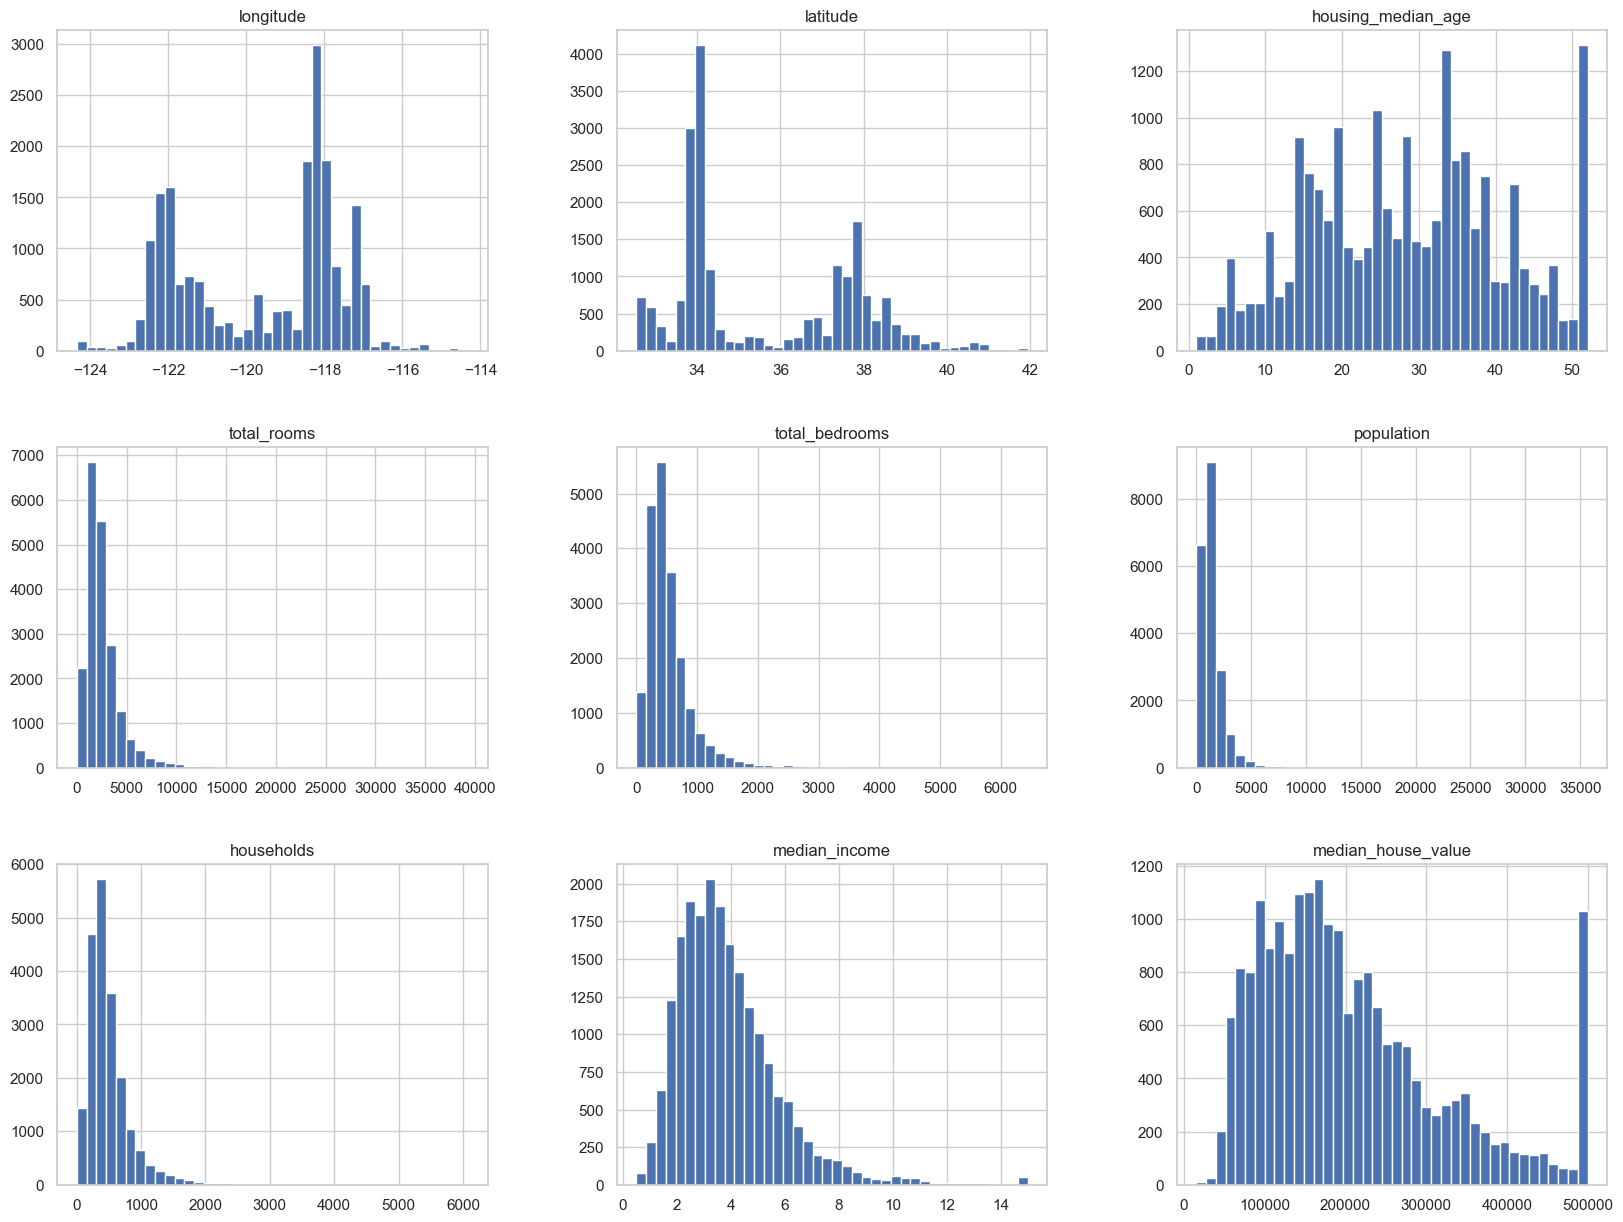

In [339]:
# doing histograms for the all the features to understand the data distributions
# using housing_df as to not plot the encoded values for OCEAN_PROXIMITY 
df.hist(bins=40, figsize=(20,15))

C:\Users\Katarzyna\AppData\Local\Temp\ipykernel_3524\2105700055.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',


<Axes: title={'center': 'Pearson Correlation Matrix'}>

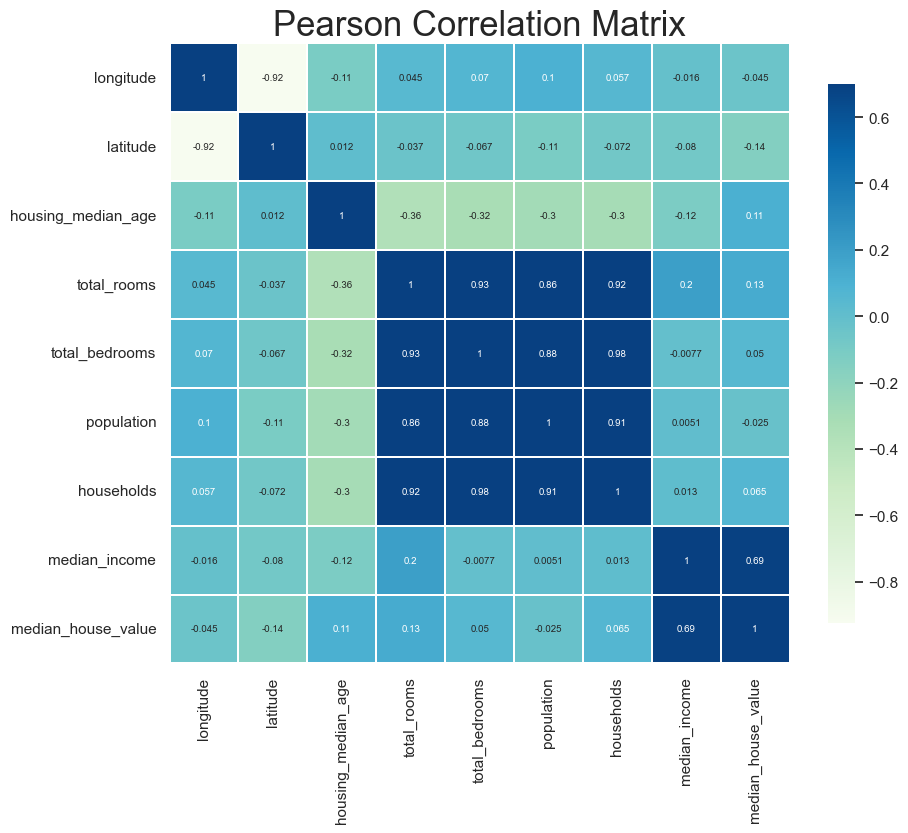

In [340]:
# buildng correlation matrix
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(10,10))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [341]:
#sorting correlation values
values_corr = df.corr()['median_house_value'].sort_values(ascending=False)
print(values_corr)

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64


C:\Users\Katarzyna\AppData\Local\Temp\ipykernel_3524\2329378106.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  values_corr = df.corr()['median_house_value'].sort_values(ascending=False)


In [342]:
# dropping column house hold, longitude, latitude as they are correlated with other features
df = df.drop('households', axis=1)
df = df.drop('longitude', axis=1)
df = df.drop('latitude', axis=1)

C:\Users\Katarzyna\AppData\Local\Temp\ipykernel_3524\871278781.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',


<Axes: title={'center': 'Pearson Correlation Matrix'}>

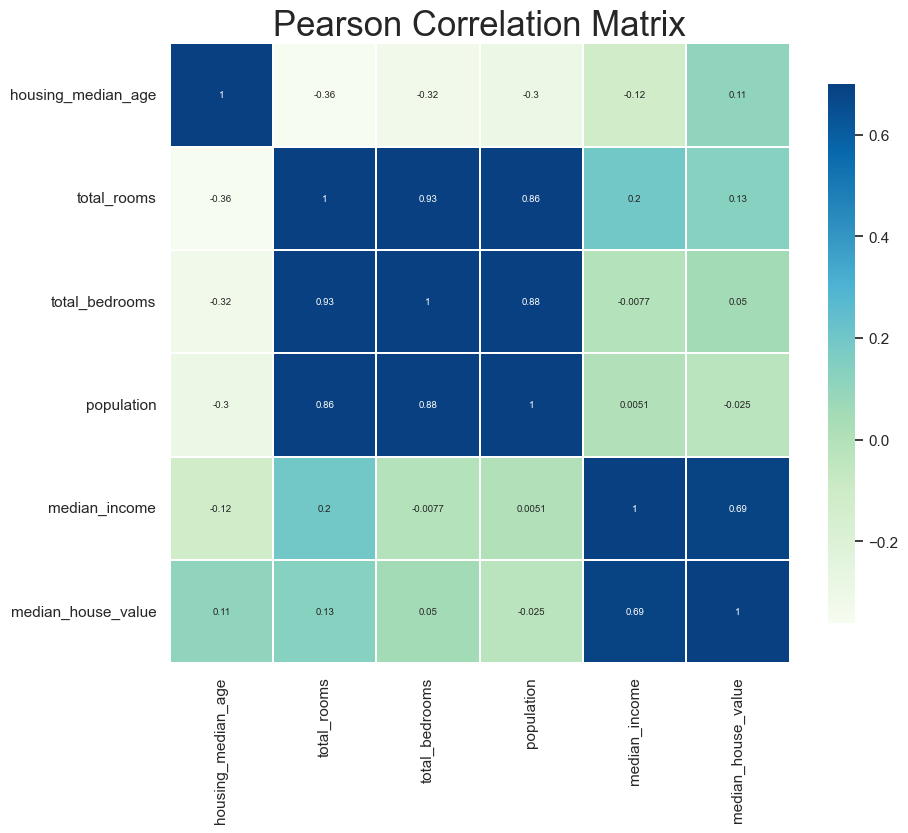

In [343]:
# checking correlation
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(10,10))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [344]:
#sorting correlation values
values_corr = df.corr()['median_house_value'].sort_values(ascending=False)
print(values_corr)

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
total_bedrooms        0.049686
population           -0.025300
Name: median_house_value, dtype: float64


C:\Users\Katarzyna\AppData\Local\Temp\ipykernel_3524\2329378106.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  values_corr = df.corr()['median_house_value'].sort_values(ascending=False)


In [345]:
# creating new feature - a ratio of the total bedrooms to the total rooms as totl bedrooms and total rooms are correlated
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']

In [346]:
df = df.drop('total_bedrooms', axis=1)
df = df.drop('total_rooms', axis=1)

C:\Users\Katarzyna\AppData\Local\Temp\ipykernel_3524\871278781.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',


<Axes: title={'center': 'Pearson Correlation Matrix'}>

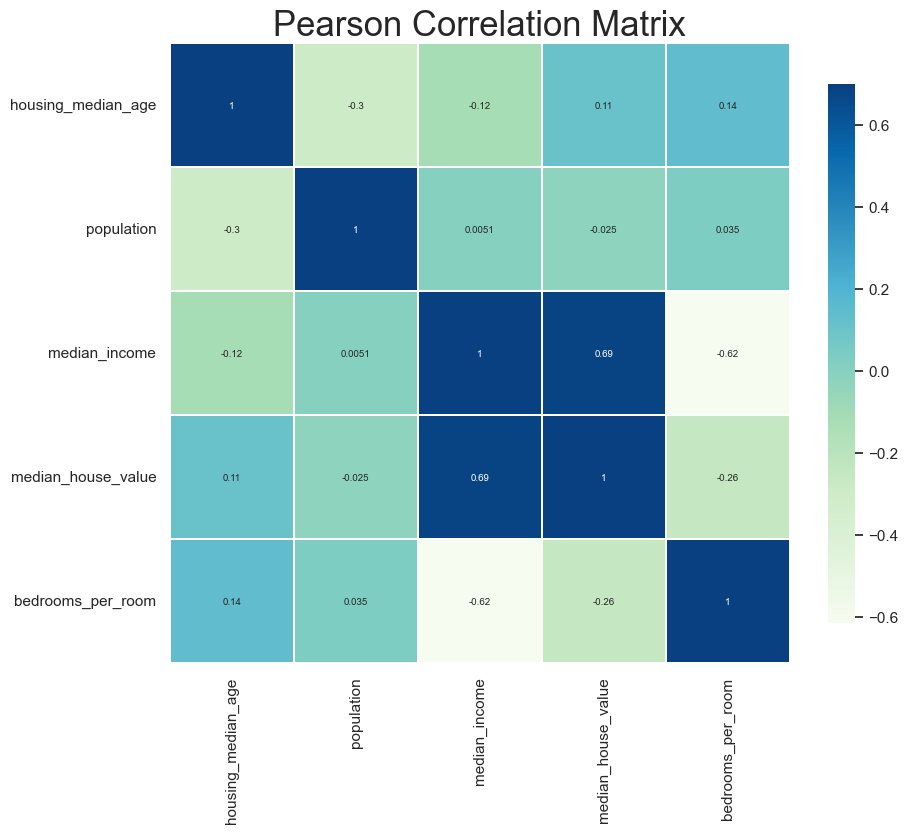

In [347]:
# checking correlation
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(10,10))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [348]:
#sorting correlation values
values_corr = df.corr()['median_house_value'].sort_values(ascending=False)
print(values_corr)

median_house_value    1.000000
median_income         0.688355
housing_median_age    0.106432
population           -0.025300
bedrooms_per_room    -0.255880
Name: median_house_value, dtype: float64


C:\Users\Katarzyna\AppData\Local\Temp\ipykernel_3524\2329378106.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  values_corr = df.corr()['median_house_value'].sort_values(ascending=False)


C:\Users\Katarzyna\AppData\Local\Temp\ipykernel_3524\3751071133.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['median_house_value'], ax=axes[0])


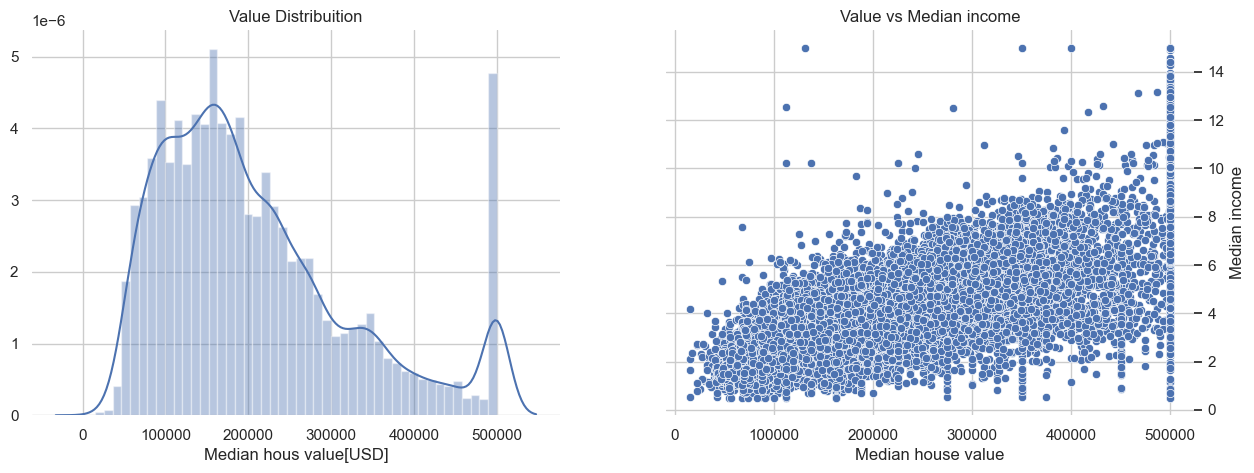

In [349]:
# visualization of correlated features
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(df['median_house_value'], ax=axes[0])
sns.scatterplot(x='median_house_value',y='median_income', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Median hous value[USD]', ylabel='', title='Value Distribuition')
axes[1].set(xlabel='Median house value', ylabel='Median income', title='Value vs Median income')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

C:\Users\Katarzyna\AppData\Local\Temp\ipykernel_3524\1928836723.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['median_house_value'], ax=axes[0])


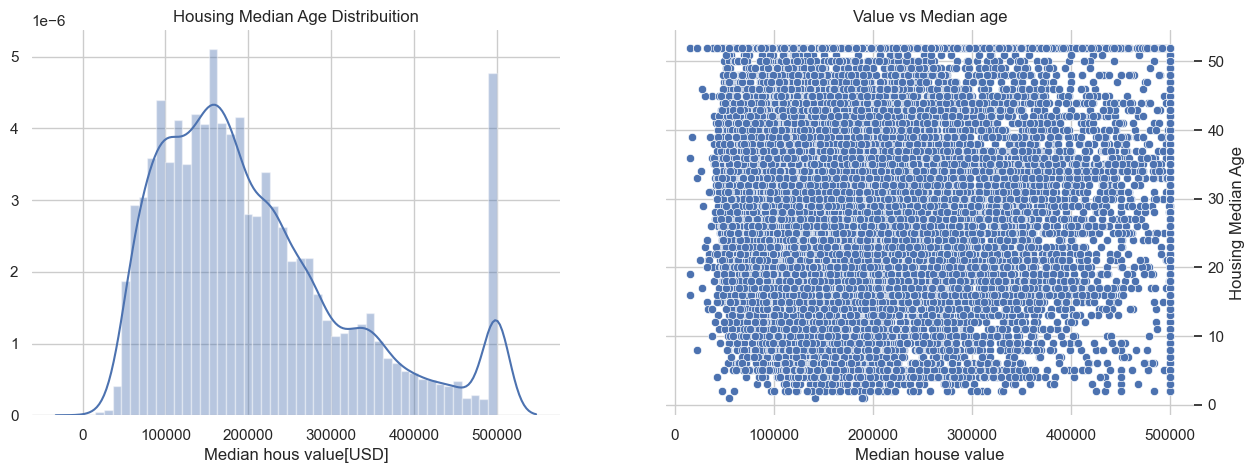

In [350]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(df['median_house_value'], ax=axes[0])
sns.scatterplot(x='median_house_value',y='housing_median_age', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Median hous value[USD]', ylabel='', title='Housing Median Age Distribuition')
axes[1].set(xlabel='Median house value', ylabel='Housing Median Age', title='Value vs Median age')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

In [351]:
# the unique categories for OCEAN_PROXIMITY
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [352]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [353]:
# encoding column OCEAN_PROXIMITY
print(pd.get_dummies(df['ocean_proximity']))

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0              0       0       0         1           0
1              0       0       0         1           0
2              0       0       0         1           0
3              0       0       0         1           0
4              0       0       0         1           0
...          ...     ...     ...       ...         ...
20635          0       1       0         0           0
20636          0       1       0         0           0
20637          0       1       0         0           0
20638          0       1       0         0           0
20639          0       1       0         0           0

[20433 rows x 5 columns]


In [354]:
df_encoded = pd.get_dummies(data=df, columns=['ocean_proximity'])

In [355]:
df_encoded.describe()

,housing_median_age,population,median_income,median_house_value,bedrooms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,28.633094,1424.946949,3.871162,206864.413155,0.213039,0.442128,0.317917,0.000245,0.111095,0.128615
std,12.591805,1133.208490,1.899291,115435.667099,0.057983,0.496652,0.465678,0.015641,0.314257,0.334782
min,1.000000,3.000000,0.499900,14999.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,787.000000,2.563700,119500.000000,0.175427,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1166.000000,3.536500,179700.000000,0.203162,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,1722.000000,4.744000,264700.000000,0.239821,1.000000,1.000000,0.000000,0.000000,0.000000
max,52.000000,35682.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [356]:
print(df_encoded.columns.values)

['housing_median_age' 'population' 'median_income' 'median_house_value'
 'bedrooms_per_room' 'ocean_proximity_<1H OCEAN' 'ocean_proximity_INLAND'
 'ocean_proximity_ISLAND' 'ocean_proximity_NEAR BAY'
 'ocean_proximity_NEAR OCEAN']


### NN

In [357]:
# Features
X = df_encoded.drop('median_house_value', axis=1)

# Label
y = df_encoded['median_house_value']

In [358]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [359]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14303, 9)
(6130, 9)
(14303,)
(6130,)


In [360]:
# Normalizing / scalling the data
# We scale the feature data. To prevent data leakage from the test set, we only fit our scaler to the training set.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and trransform
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Everything has been scaled between 1 and 0
print('Max:', X_train.max())
print('Min:', X_train.min())

Max: 1.0
Min: 0.0


In [361]:
# Creating a model
# We estimate the number of neurons (units) from our features. The optimizer is asking how you want to perform this gradient descent. In this case we are using the Adam optimizer and the mean square error loss function.
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam


model = Sequential()
# Input layer
model.add(Dense(9, activation='relu'))

# Hidden layers
model.add(Dense(9, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(9, activation='relu'))

# Output layer
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mse')


In [362]:
# Training the model
# Now we can fit the model into the data. Since, the dataset is large, we are going to use batches of the power of 2 (32, 64, 128, 256...). In this case we are using 128. The smaller batch size, the longer is going to take.

model.fit(x=X_train, y=y_train.values,
          validation_data=(X_test, y_test.values),
          batch_size=64, epochs=150)

Epoch 1/150


224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 56584257536.0000 - val_loss: 54768357376.0000
Epoch 2/150
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56242405376.0000 - val_loss: 52576841728.0000
Epoch 3/150
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51712167936.0000 - val_loss: 38796431360.0000
Epoch 4/150
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34523590656.0000 - val_loss: 16448201728.0000
Epoch 5/150
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14625353728.0000 - val_loss: 10773490688.0000
Epoch 6/150
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10723963904.0000 - val_loss: 9884720128.0000
Epoch 7/150
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10016827392.0000 - val_loss: 9292957696.0000
Epoch 8/150
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9424247808.0000 - val_loss: 8841518080.0000
Epoch 9/150
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9034019840.0000 - val_loss: 8475079168.0000
Epoch 10/150
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

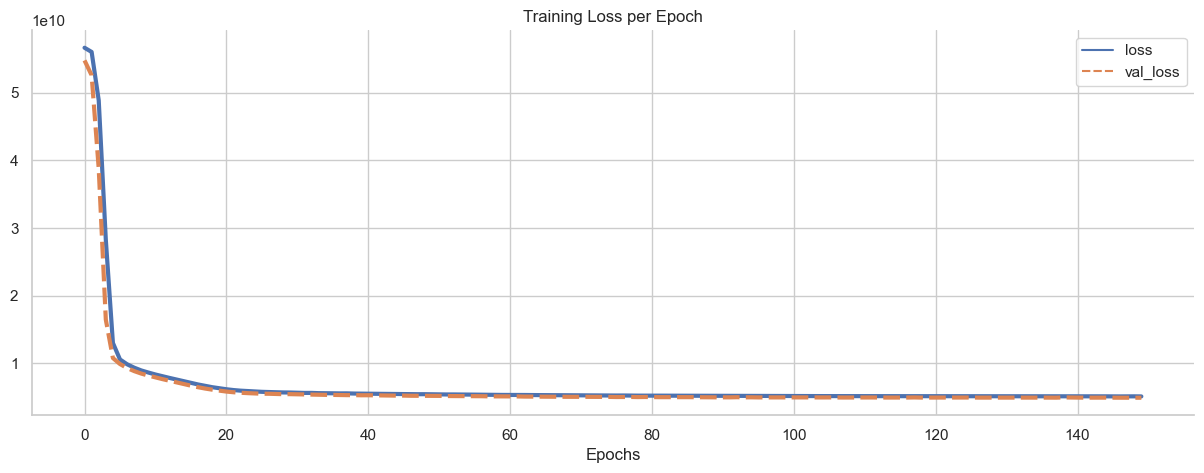

In [363]:
# Trainning loss per epoch

losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses, lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [364]:
# Evaluation on test data
# Regression Evaluation Metrics:
# Mean Absolute Error MAE is the mean of the absolute values of the errors
# Mean Squared Error (MSE) is the mean of the squared errors
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

# Predictions on the test set
predictions = model.predict(X_test)

print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))
print('Variance Regression Score: ', explained_variance_score(y_test, predictions))

print(df_encoded['median_house_value'].describe())

192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE:  50538.02349118704
MSE:  4900045764.135166
RMSE:  70000.32688591651
Variance Regression Score:  0.6271483320695832
count     20433.000000
mean     206864.413155
std      115435.667099
min       14999.000000
25%      119500.000000
50%      179700.000000
75%      264700.000000
max      500001.000000
Name: median_house_value, dtype: float64


C:\Users\Katarzyna\AppData\Local\Temp\ipykernel_3524\1534199678.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

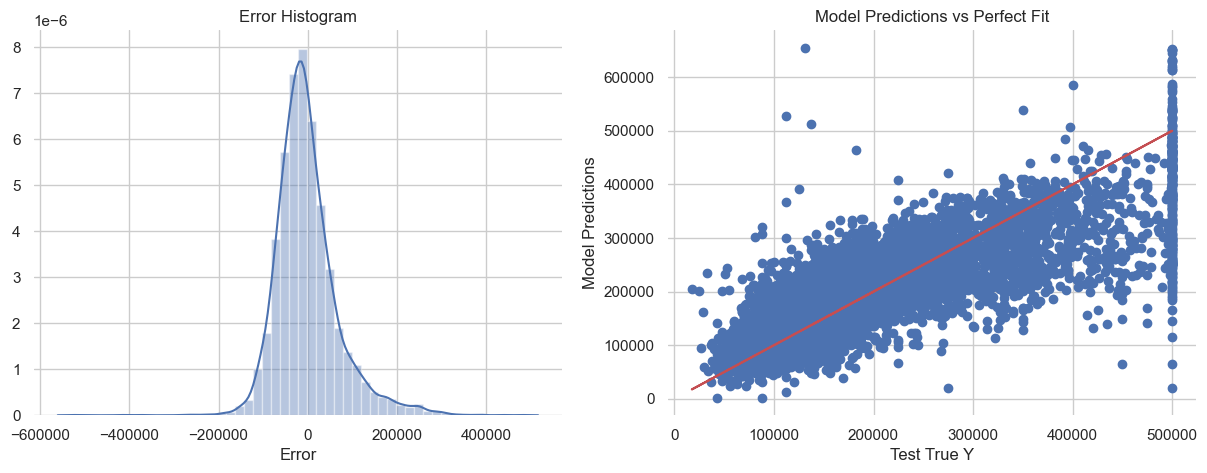

In [365]:
# Model predictions vs. perfect fit
# We can compare the model predictions with a perfect fit to see how accurate the model is.
# The red line represents the perfect prediction.

f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(6130, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [366]:
# Predicting on a brand new house
#We are going to use the model to predict the price on a brand-new house. We are going to choose the first house of the data set and drop the price. single_house is going to have all the features that we need to predict the price. After that we need to reshape the variable and scale the features.

# features of new house
single_house = df_encoded.drop('median_house_value',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 9))

# run the model and get the price prediction
print('\nPrediction Price:',model.predict(single_house)[0,0])

# original price
print('\nOriginal Price:',df.iloc[0]['median_house_value'])

Features of new house:
housing_median_age             41.000000
population                    322.000000
median_income                   8.325200
bedrooms_per_room               0.146591
ocean_proximity_<1H OCEAN       0.000000
ocean_proximity_INLAND          0.000000
ocean_proximity_ISLAND          0.000000
ocean_proximity_NEAR BAY        1.000000
ocean_proximity_NEAR OCEAN      0.000000
Name: 0, dtype: float64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Prediction Price: 440260.6

Original Price: 452600.0


c:\Users\Katarzyna\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
